In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

### Ejercicio 1

In [9]:
# 1a)
def coefs_rl(x, y):
    beta_1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
    beta_0 = y.mean() - beta_1*x.mean()
    return beta_1, beta_0

In [14]:
# 1b)
datos = gapminder[gapminder['country'] == 'Argentina']
print(coefs_rl(datos['year'], datos['lifeExp']))

modelo = linear_model.LinearRegression()
modelo.fit(datos[['year']], datos[['lifeExp']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print(beta_1, beta_0)

(0.2317083916083916, -389.6063445221445)
0.23170839160839155 -389.6063445221444


### Ejercicio 2

In [16]:
# Cargamos el dataset inmuebles.csv
datos = pd.read_csv('datos/inmuebles.csv')
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


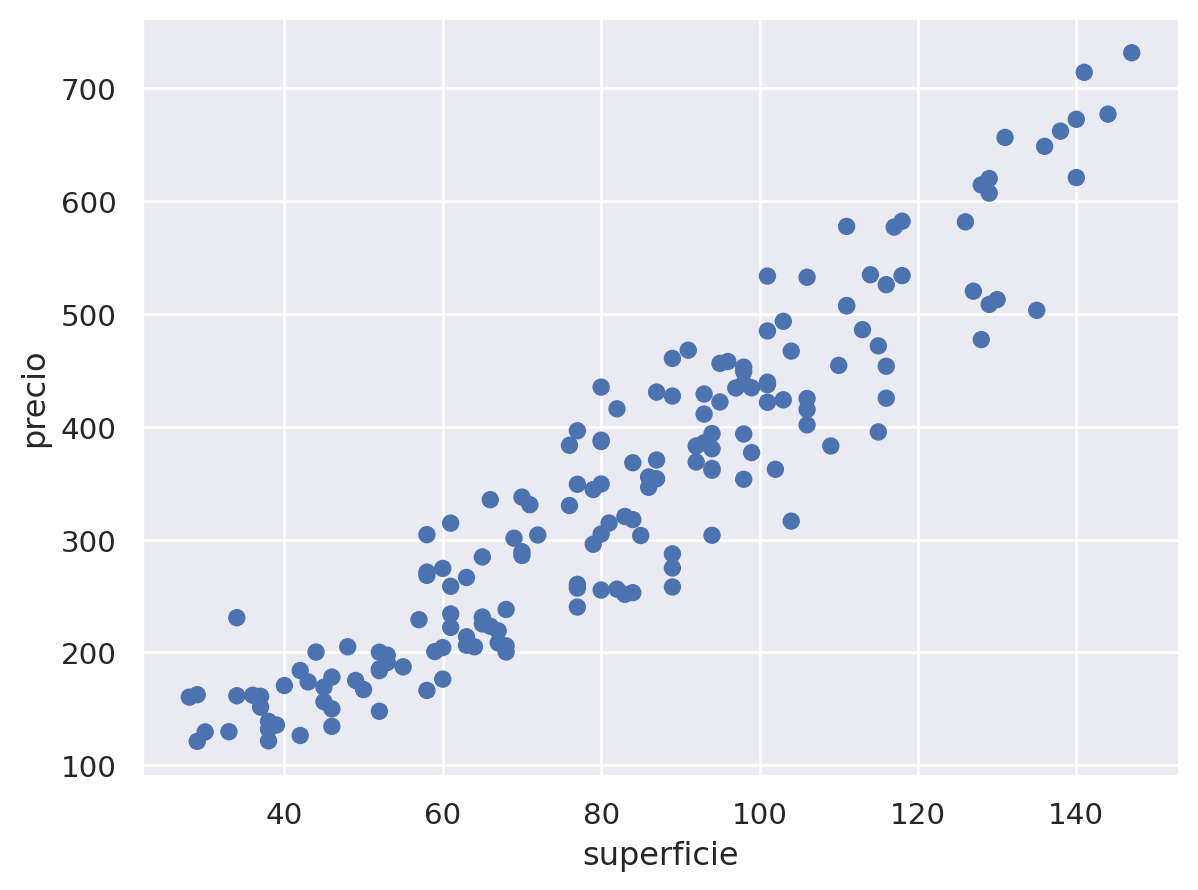

In [17]:
#A

(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
)

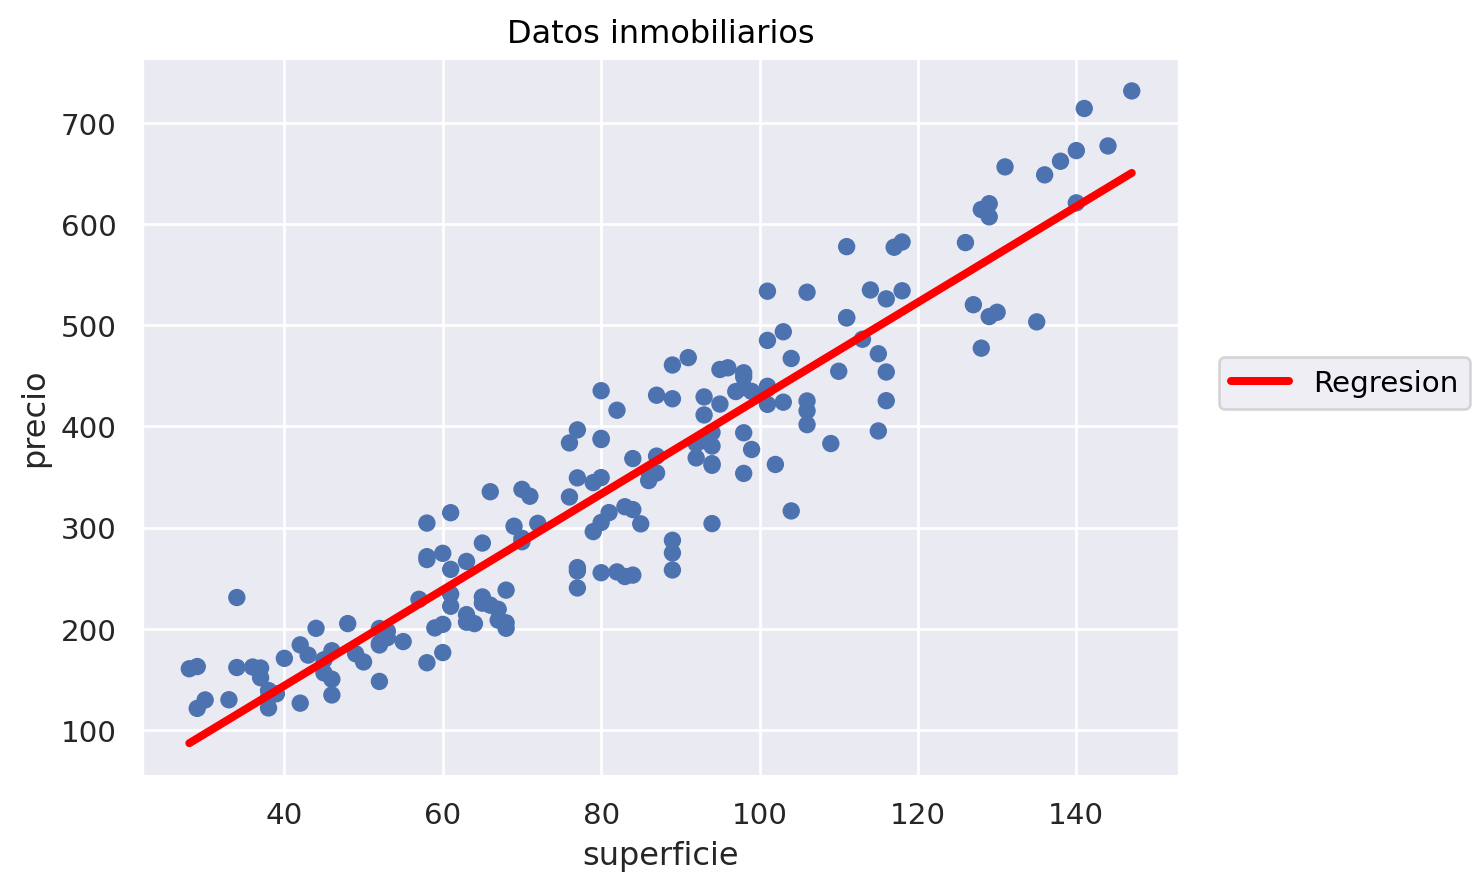

In [19]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos inmobiliarios')    # Agregamos la leyenda y un titulo
)

In [20]:
# C)

modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['superficie']], datos[['precio']])   # Realizamos el ajuste
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

Beta_1:  4.73579682230239
Beta_0:  -45.73153403092567


In [21]:
# D)

def ecm(x, y, pendiente, o_origen):      
    return 1/len(x) * np.sum((y - (pendiente * x + o_origen))**2)

def r_cuad(x, y, pendiente, o_origen):
    return np.sum(((pendiente * x + o_origen) - y.mean())**2) / np.sum((y - y.mean())**2)

In [23]:
# E)

print('ECM: ', ecm(datos['superficie'], datos['precio'], beta_1, beta_0))
print('Rsq: ', r_cuad(datos['superficie'], datos['precio'], beta_1, beta_0))

ECM:  2630.9300019446955
Rsq:  0.8762114698357931


In [28]:
# F)

y_pred = modelo.predict(datos[['superficie']]).flatten()
print('ECM: ', mean_squared_error(datos[['precio']], y_pred))
print('Rsq: ', r2_score(datos[['precio']], y_pred))

ECM:  2630.9300019446955
Rsq:  0.8762114698357936


<Axes: xlabel='zona', ylabel='precio'>

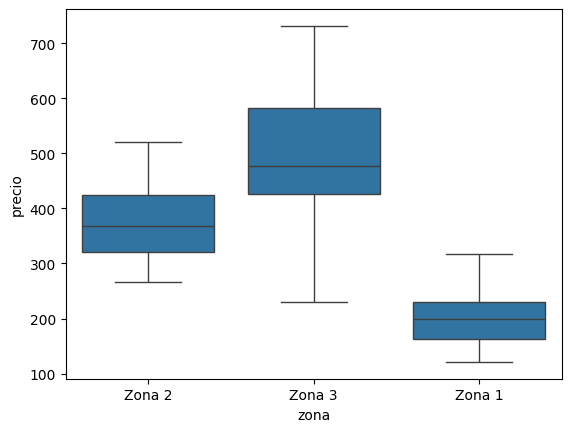

In [29]:
# G)
sns.boxplot(datos, x='zona', y='precio')

In [44]:
# H)

modelo = linear_model.LinearRegression()

for i in [1,2,3]:
    dz = datos[datos['zona'] == f'Zona {i}']
    modelo.fit(dz[['superficie']], dz[['precio']])
    print(f'Coeficientes Zona {i}: ', (modelo.coef_.item(), modelo.intercept_.item()))
    y_pred = modelo.predict(dz[['superficie']]).flatten()
    print(f'ECM Zona {i}: ', mean_squared_error(dz[['precio']], y_pred))
    print(f'Rsq Zona {i}: ', r2_score(dz[['precio']], y_pred), '\n')


Coeficientes Zona 1:  (2.442081388302122, 58.852000241172306)
ECM Zona 1:  331.22746770470974
Rsq Zona 1:  0.855923919218176 

Coeficientes Zona 2:  (3.206278999112207, 80.73010925558549)
ECM Zona 2:  611.4955812522104
Rsq Zona 2:  0.866027281146202 

Coeficientes Zona 3:  (4.560544269538954, 24.966485225784936)
ECM Zona 3:  748.8800907160429
Rsq Zona 3:  0.9445652745220188 



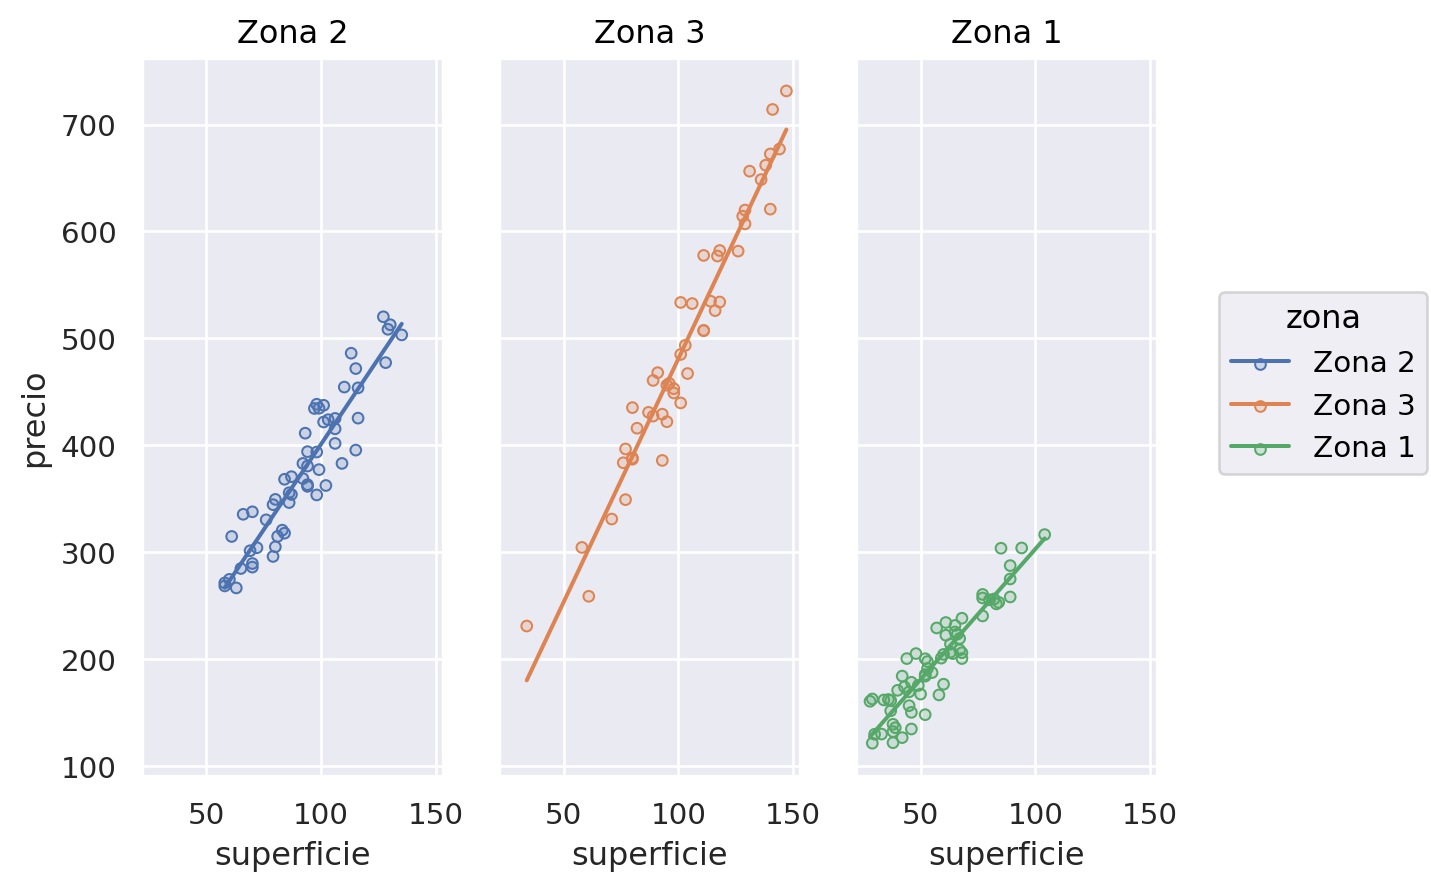

In [45]:
# I)

(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dots(), color='zona')
    .add(so.Line(), so.PolyFit(1), color='zona')
    .facet('zona')
)

In [47]:
# J)

# Idealmente me hubiera guardado los coeficientes
modelo.fit(datos[['superficie']], datos[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Sin saber zona: ', beta_1 * 105 + beta_0)

dz = datos[datos['zona'] == 'Zona 2']
modelo.fit(dz[['superficie']], dz[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Sabiendo zona: ', beta_1 * 105 + beta_0)

Sin saber zona:  451.5271323108253
Sabiendo zona:  417.3894041623672


In [49]:
# K) 

beta_1 * 100 + beta_0 - 300

101.3580091668062

Beta_1:  4.266539806966732
Beta_0:  72.89381076100466


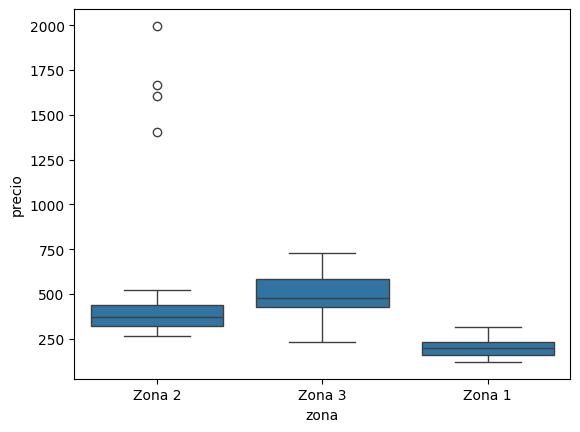

In [55]:
# L)

sns.boxplot(datos, x='zona', y='precio')

datos = pd.read_csv('datos/inmuebles_outliers.csv')

dz = datos[datos['zona'] == 'Zona 2']
modelo.fit(dz[['superficie']], dz[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

### Ejercicio 2

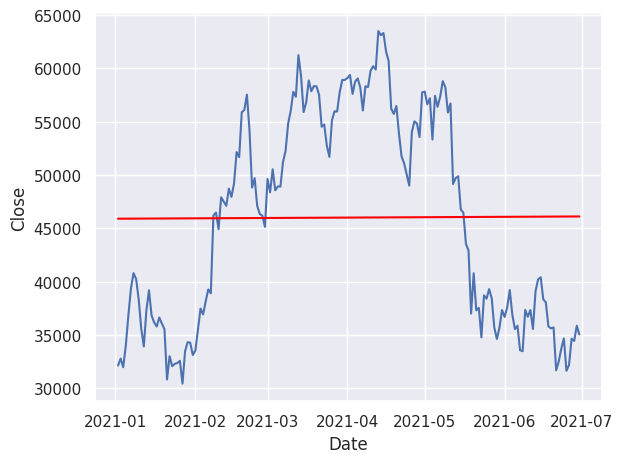

In [59]:
btc = pd.read_csv('datos/bitcoin.csv')
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

btc_2021 = btc[(btc['Date'] > "2021-01-01") & (btc['Date'] < "2021-07-01")]
plot = (
    so.Plot(data=btc_2021, x='Date', y='Close')
    .add(so.Line(),)
    .add(so.Line(color='red'), so.PolyFit(1))
    .scale(x=so.Temporal('Date').tick(upto=25))
)
plot.show()